Add and train the Model

In [2]:
import GeneralPrediction
import StockPrediction
import TechnicalAnalysis
from keras.models import load_model

name = "AMD"

In [4]:
stock = StockPrediction.addStock(name, start="2010-1-1", source='stooq')
stock = stock.iloc[::-1]

Adding AMD...


In [3]:
"""
trainX, trainY = StockPrediction.normalize(stock)
StockPrediction.train(trainX, trainY, epoch=20)
"""

'\ntrainX, trainY = StockPrediction.normalize(stock)\nStockPrediction.train(trainX, trainY, epoch=20)\n'

Do test runs on past stock prices

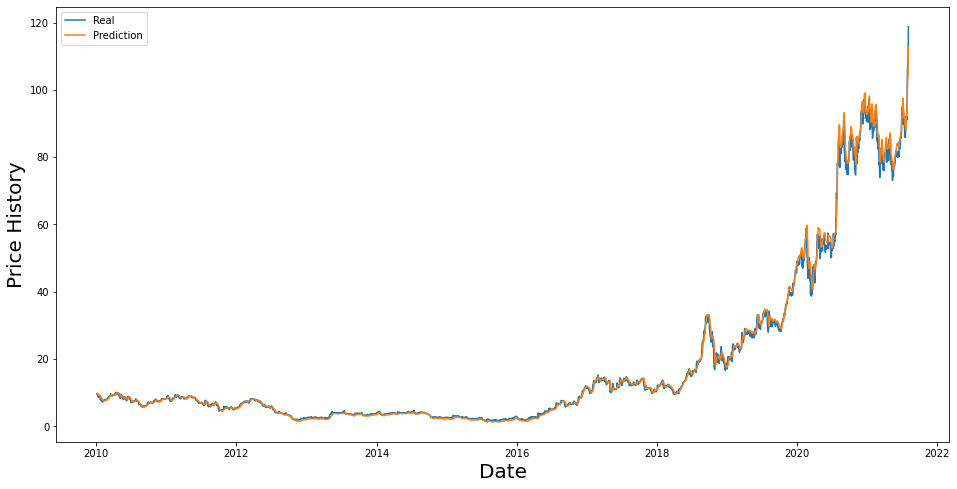

Date
2010-01-04      9.609270
2010-01-05      9.692569
2010-01-06      9.756806
2010-01-07      9.779189
2010-01-08      9.766541
                 ...    
2021-07-29     96.618172
2021-07-30    100.457596
2021-08-02    104.784607
2021-08-03    108.794701
2021-08-04    112.686066
Name: Prediction, Length: 2917, dtype: float32

In [5]:
model = load_model("ModelList/{}".format(name))
StockPrediction.test(model, stock, evaluate=True)

Do an actual price prediction with the most recent stock price

Adding AMD...
2021-08-05    114.994865
Freq: D, Name: Close, dtype: float32


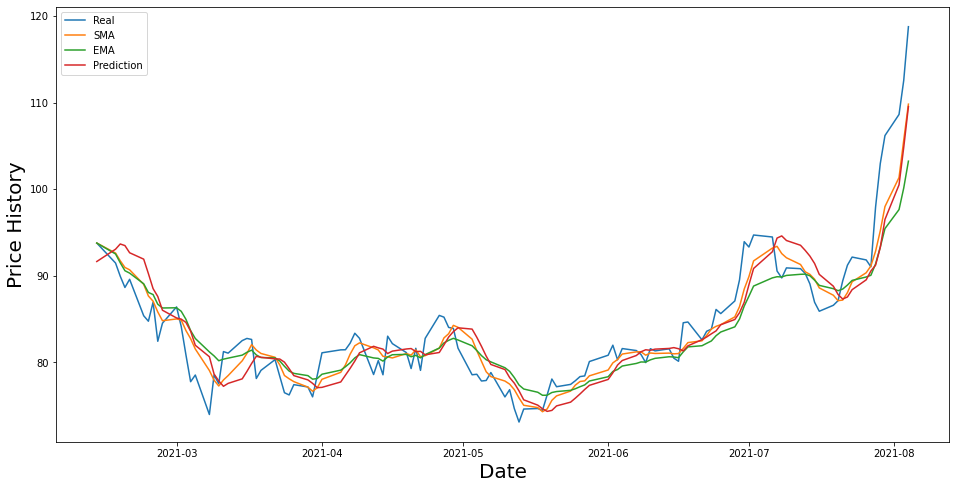

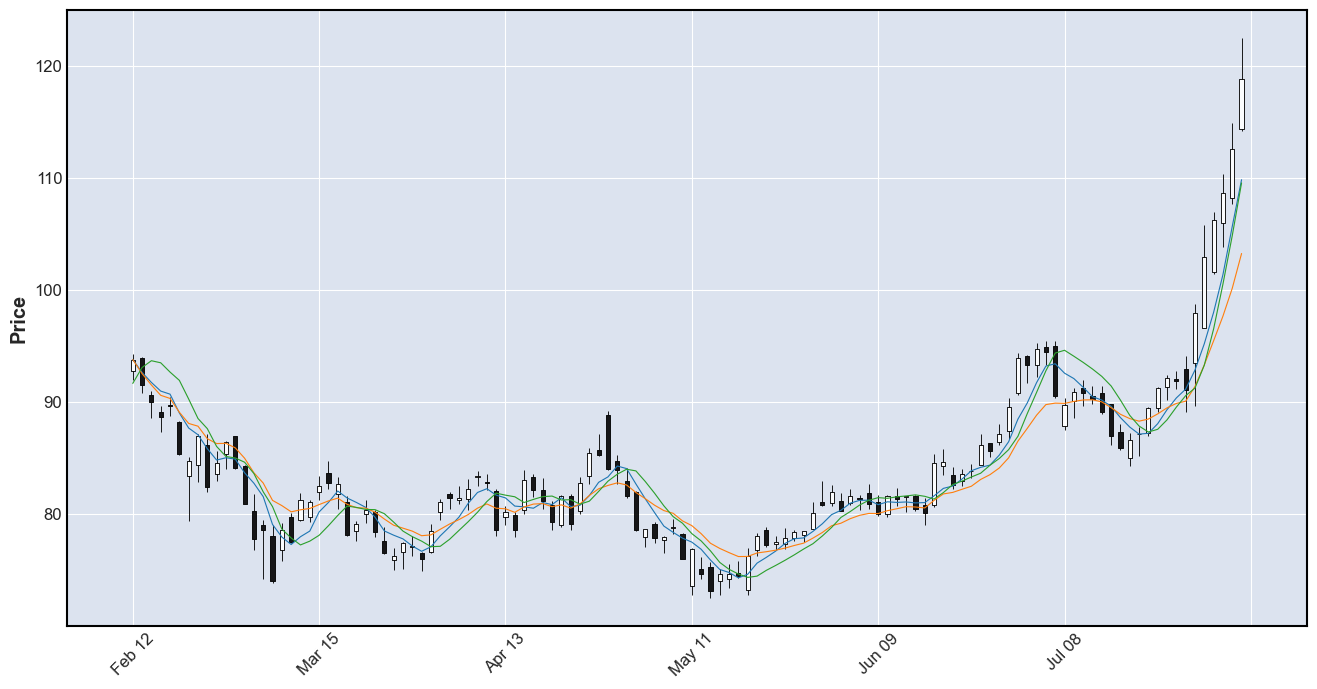

In [6]:
stock = StockPrediction.addStock(name, start="2010-1-1", source='stooq')
stock = stock.iloc[::-1]
stock = stock[-120:]

model = load_model("ModelList/{}".format(name))

prediction = GeneralPrediction.Prediction(stock, model)
test = StockPrediction.test(model, stock, evaluate=False)

SMA = TechnicalAnalysis.SMA(stock)
EMA = TechnicalAnalysis.EMA(stock)

nextDay, data = prediction.nextDay()
print(data)

StockPrediction.visualize([(stock["Close"], "Real"),
                        (SMA, "SMA"),
                        (EMA, "EMA"),
                        (stock["Prediction"], "Prediction")])
                        
TechnicalAnalysis.candleStick(stock=stock, 
                            inputs=[(SMA, "SMA"),
                                    (EMA, "EMA"),
                                    (stock["Prediction"], "Prediction")])

Adding TSLA...
[('SMA Cross', False), ('MACD', False), ('RSI', False), ('Window', None)]


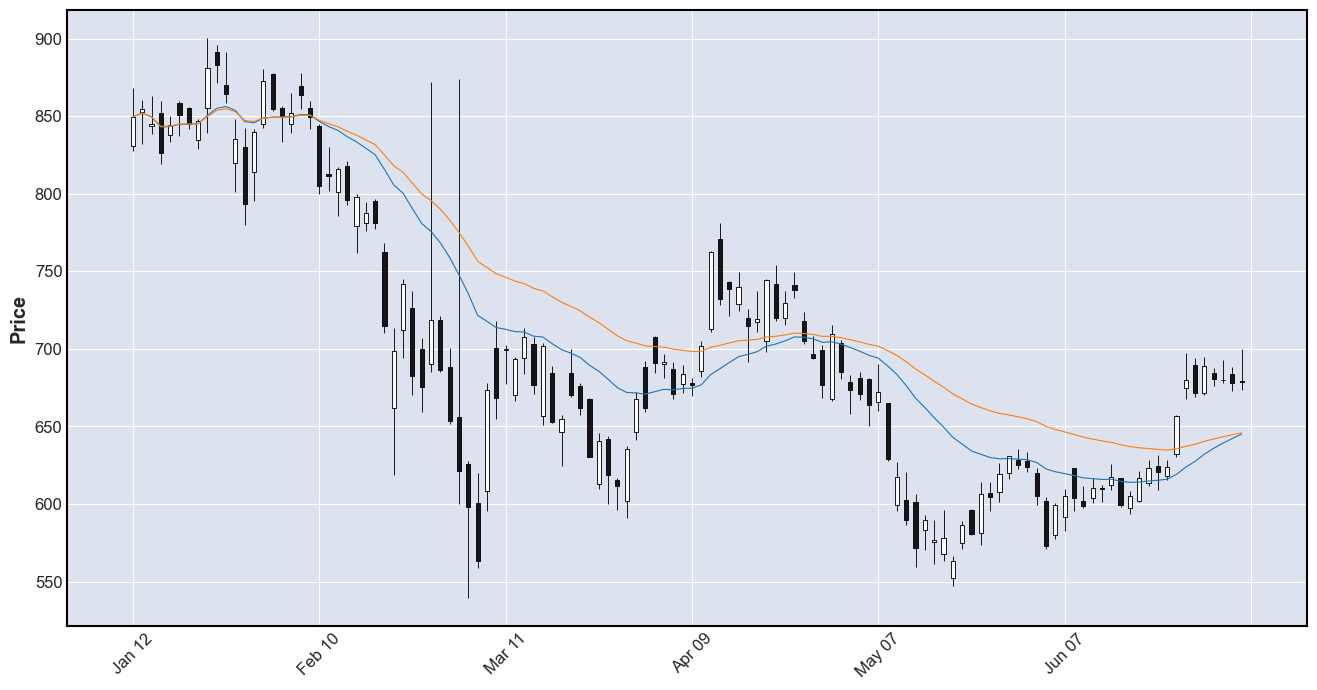

In [ ]:
import GeneralPrediction
import StockPrediction
import TechnicalAnalysis
from keras.models import load_model

name = "AMD"
stock = StockPrediction.addStock(name, start="2010-1-1", source='stooq')
stock = stock.iloc[::-1]
stock = stock[-120:]

MACD0, MACD1 = TechnicalAnalysis.MACD(stock)
RSI = TechnicalAnalysis.RSI(stock)
OBV = TechnicalAnalysis.OBV(stock)

print(list(TechnicalAnalysis.analyze(stock)))

TechnicalAnalysis.candleStick(stock, [
                        (MACD0, "0"),
                        (MACD1, "1")])
